<a href="https://colab.research.google.com/github/anjali481/Covid-Tracker/blob/master/Covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.layers  import AveragePooling2D
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset= ("/content/gdrive/My Drive/Data")

In [ ]:
args={}
args['dataset']=dataset

In [ ]:
dataset

'/content/gdrive/My Drive/Data'

In [ ]:
args

{'dataset': '/content/gdrive/My Drive/Data'}

In [ ]:
import numpy as np
import cv2
import os
from imutils import paths
	

iPaths=list(paths.list_images(args['dataset']))

data=[]
labels=[]

for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image,(224, 224))
    data.append(image)
    labels.append(label)



data=np.array(data)/255.0
labels=np.array(labels)


In [ ]:
labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [ ]:
import os
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_dir=("/content/gdrive/My Drive/Data//")

In [ ]:

import os
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
Cimages=os.listdir(dataset+"/Covid")
Nimages=os.listdir(dataset+"/Normal")


In [ ]:
Nimages


['IM-0230-0001.jpeg',
 'IM-0253-0001.jpeg',
 'IM-0289-0001.jpeg',
 'IM-0251-0001.jpeg',
 'IM-0205-0001.jpeg',
 'IM-0279-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0249-0001.jpeg',
 'IM-0220-0001.jpeg',
 'IM-0295-0001.jpeg',
 'IM-0235-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0221-0001.jpeg',
 'IM-0211-0001.jpeg',
 'IM-0257-0001.jpeg',
 'IM-0242-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0262-0001.jpeg',
 'IM-0240-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0286-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0277-0001.jpeg',
 'IM-0245-0001.jpeg',
 'IM-0276-0001.jpeg',
 'IM-0278-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0217-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0282-0001.jpeg',
 'IM-0293-0001.jpeg',
 'IM-0283-0001.jpeg',
 'IM-0236-0001.jpeg',
 'IM-0229-0001.jpeg',
 'IM-0239-0001.jpeg',
 'IM-0256-0001.jpeg',
 'IM-0234-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0274-0001.jpeg',
 'IM-0219-0001.jpeg',
 'IM-0209-

Normal and chest


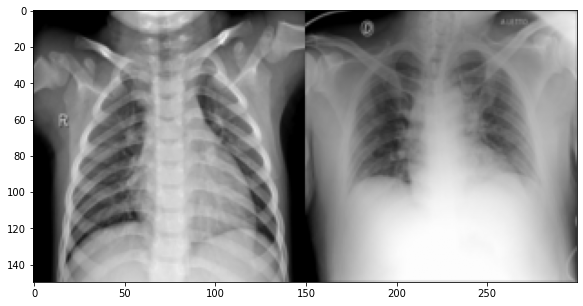

Normal and chest


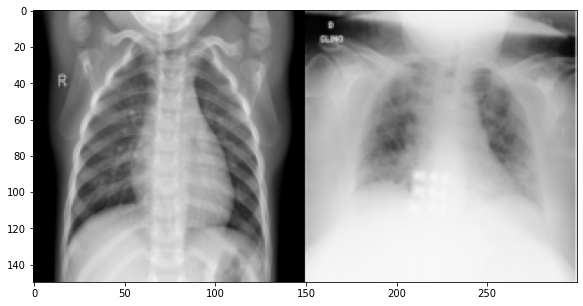

Normal and chest


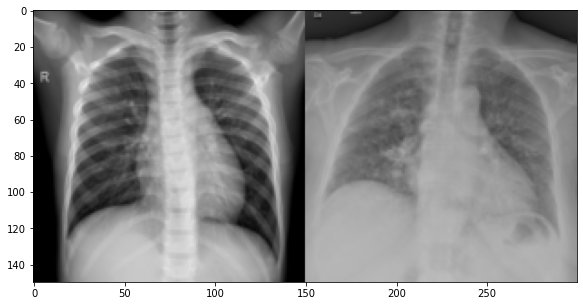

Normal and chest


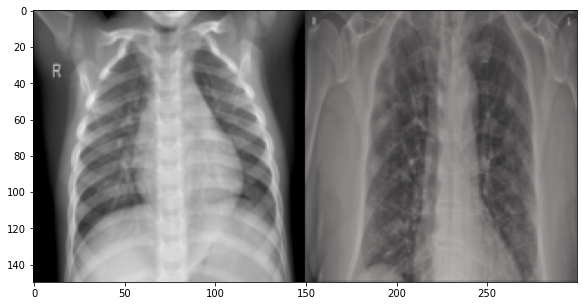

Normal and chest


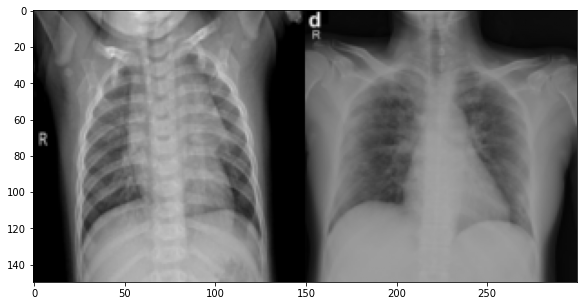

In [ ]:
import matplotlib.pyplot as plt

import cv2
import skimage
from skimage.transform import resize
import numpy as np

def plotter(i):
  normal=cv2.imread(Data_dir+"Normal//"+Nimages[i])
  normal=skimage.transform.resize(normal,(150,150,3))
  coronavirus=cv2.imread(Data_dir+"Covid//"+Cimages[i])
  coronavirus=skimage.transform.resize(coronavirus,(150,150,3),mode="reflect")
  pair=np.concatenate((normal,coronavirus),axis=1)
  print("Normal and chest")
  plt.figure(figsize=(10,5))
  plt.imshow(pair)
  plt.show()
for i in range(0,5):
  plotter(i)  


In [ ]:
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [ ]:
(X_train,X_test,Y_train,Y_test)=train_test_split(data,labels,test_size=0.20 ,random_state=42,stratify=labels)


In [ ]:

X_train

array([[[[0.4       , 0.4       , 0.4       ],
         [0.40392157, 0.40392157, 0.40392157],
         [0.40392157, 0.40392157, 0.40392157],
         ...,
         [0.43529412, 0.43529412, 0.43529412],
         [0.49803922, 0.49803922, 0.49803922],
         [0.42352941, 0.42352941, 0.42352941]],

        [[0.39607843, 0.39607843, 0.39607843],
         [0.4       , 0.4       , 0.4       ],
         [0.40392157, 0.40392157, 0.40392157],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.45490196, 0.45490196, 0.45490196],
         [0.27058824, 0.27058824, 0.27058824]],

        [[0.39607843, 0.39607843, 0.39607843],
         [0.40784314, 0.40784314, 0.40784314],
         [0.4       , 0.4       , 0.4       ],
         ...,
         [0.44313725, 0.44313725, 0.44313725],
         [0.29411765, 0.29411765, 0.29411765],
         [0.2745098 , 0.2745098 , 0.2745098 ]],

        ...,

        [[0.01568627, 0.01568627, 0.01568627],
         [0.00392157, 0.00392157, 0.00392157]

In [ ]:
X_train.shape

(160, 224, 224, 3)

In [ ]:
trainAug=ImageDataGenerator(rotation_range=15,fill_mode="nearest")

In [ ]:
trainAug

In [ ]:
bmodel=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [ ]:

bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
hmodel=bmodel.output
hmodel=AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel=Flatten(name="flatten")(hmodel)
hmodel=Dense(64,activation="relu")(hmodel)
hmodel=Dropout(0.5)(hmodel)

hmodel=Dense(2,activation="softmax")(hmodel)

model=Model(bmodel.input,hmodel)
for layer in bmodel.layers:
  layer.trainable=False



In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:

X_train.shape

(160, 224, 224, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


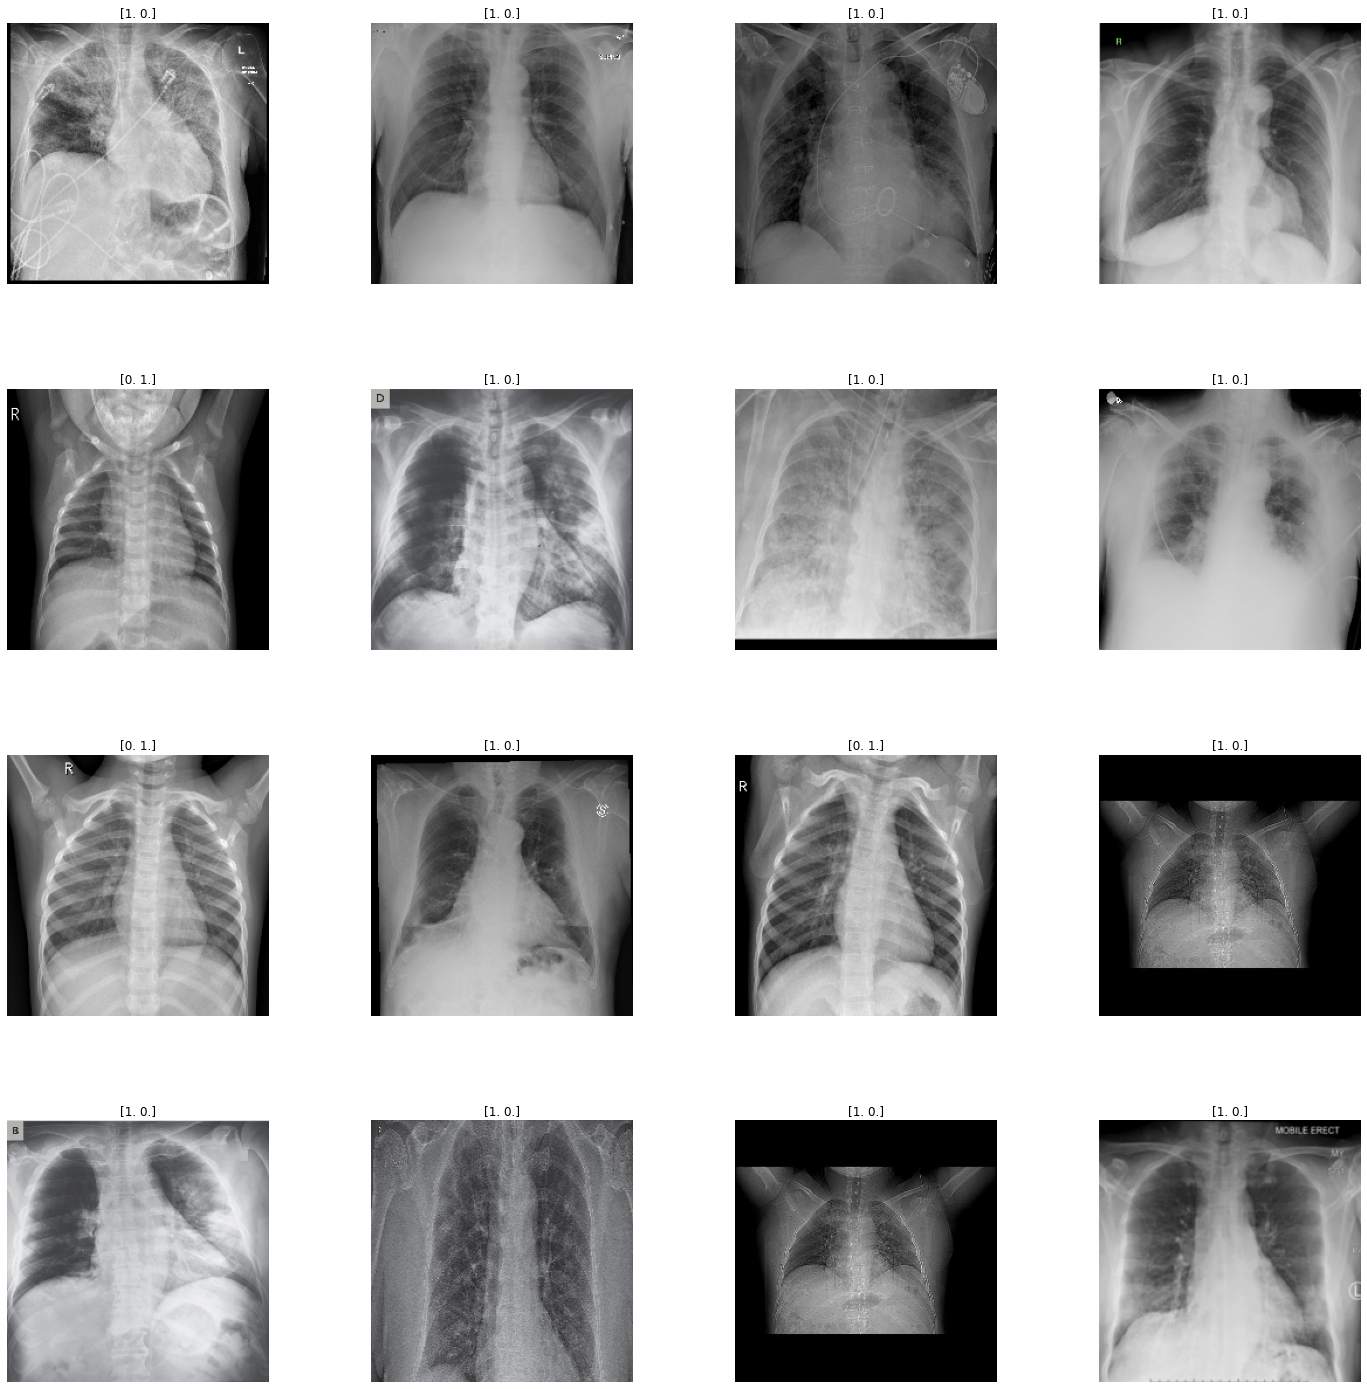

In [ ]:

fig,axes=plt.subplots(4,4,figsize=(25,25))

axes=axes.ravel()

n_training=len(X_train)
for i in np.arange(0,4*4):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index])
  axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)  

In [ ]:


INIT_LR = 1e-3
EPOCHS = 5
BS = 8
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
history= model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
20/20 [==============================] - 98s 5s/step - loss: 0.7439 - accuracy: 0.5813 - val_loss: 0.5334 - val_accuracy: 0.9750
Epoch 2/5
20/20 [==============================] - 98s 5s/step - loss: 0.5149 - accuracy: 0.7875 - val_loss: 0.4299 - val_accuracy: 0.9250
Epoch 3/5
20/20 [==============================] - 98s 5s/step - loss: 0.4452 - accuracy: 0.8562 - val_loss: 0.3381 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 98s 5s/step - loss: 0.3460 - accuracy: 0.9250 - val_loss: 0.2654 - val_accuracy: 0.9750
Epoch 5/5
20/20 [==============================] - 98s 5s/step - loss: 0.2834 - accuracy: 0.9438 - val_loss: 0.2183 - val_accuracy: 0.9750


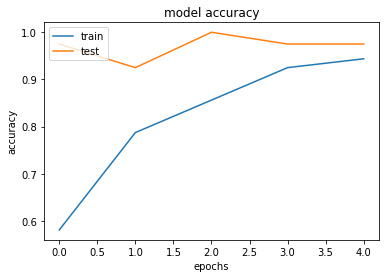

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()